[2080\. Range Frequency Queries](https://leetcode.com/problems/range-frequency-queries/)

Solved

Medium

Topics

Companies

Hint

Design a data structure to find the frequency of a given value in a given subarray.

The frequency of a value in a subarray is the number of occurrences of that value in the subarray.

Implement the `RangeFreqQuery` class:

*   `RangeFreqQuery(int[] arr)` Constructs an instance of the class with the given 0-indexed integer array `arr`.
*   `int query(int left, int right, int value)` Returns the frequency of `value` in the subarray `arr[left...right]`.

A subarray is a contiguous sequence of elements within an array. `arr[left...right]` denotes the subarray that contains the elements of `nums` between indices `left` and `right` (inclusive).

Example 1:

Input
\["RangeFreqQuery", "query", "query"\]
\[\[\[12, 33, 4, 56, 22, 2, 34, 33, 22, 12, 34, 56\]\], \[1, 2, 4\], \[0, 11, 33\]\]
Output
\[null, 1, 2\]

Explanation
RangeFreqQuery rangeFreqQuery = new RangeFreqQuery(\[12, 33, 4, 56, 22, 2, 34, 33, 22, 12, 34, 56\]);
rangeFreqQuery.query(1, 2, 4); // return 1. The value 4 occurs 1 time in the subarray \[33, 4\]
rangeFreqQuery.query(0, 11, 33); // return 2. The value 33 occurs 2 times in the whole array.

Constraints:

*   `1 <= arr.length <= 105`
*   `1 <= arr[i], value <= 104`
*   `0 <= left <= right < arr.length`
*   At most `105` calls will be made to `query`

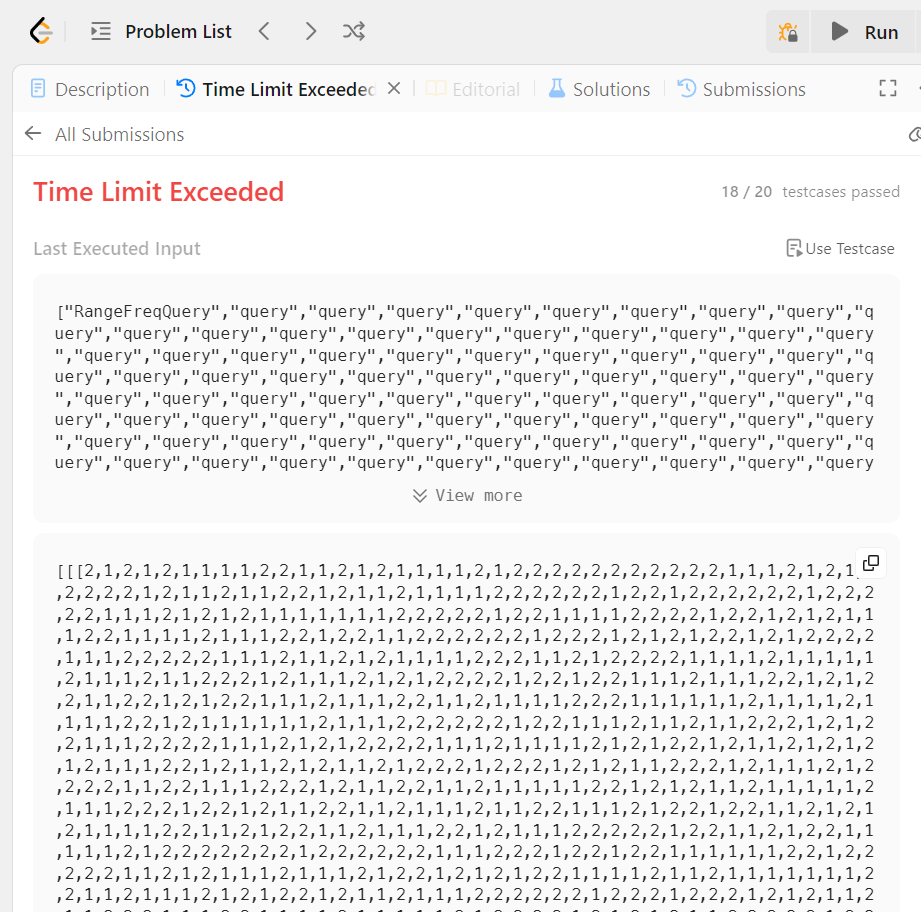

In [1]:
from typing import List
# class Query:
#     def __init__(self, left, right, index):
#         self.left = left
#         self.right = right
#         self.index = index

class RangeFreqQuery:

    def __init__(self, arr: List[int]):
        self.arr = arr
        self.n = len(self.arr)
        # self.blocksize = math.ceil(math.sqrt(self.n))
        self.currentleft = 0
        self.currentright = -1
        self.currentfreq = dict()

    
    def query(self, left: int, right: int, value: int) -> int:
        # print(left, right, self.currentright)
        # print(self.currentfreq)
        while self.currentright < right:
            self.currentright += 1
            self.currentfreq[self.arr[self.currentright]] = self.currentfreq.get(self.arr[self.currentright], 0) + 1

        while self.currentleft > left:
            self.currentleft -= 1
            self.currentfreq[self.arr[self.currentleft]] = self.currentfreq.get(self.arr[self.currentleft], 0) + 1

        while self.currentright > right:
            self.currentfreq[self.arr[self.currentright]] -= 1
            if self.currentfreq[self.arr[self.currentright]] == 0:
                del self.currentfreq[self.arr[self.currentright]]
            self.currentright -= 1


        while self.currentleft < left:
            self.currentfreq[self.arr[self.currentleft]] -= 1
            if self.currentfreq[self.arr[self.currentleft]] == 0:
                del self.currentfreq[self.arr[self.currentleft]]
            self.currentleft += 1


        return self.currentfreq.get(value, 0)



        
        


# Your RangeFreqQuery object will be instantiated and called as such:
# obj = RangeFreqQuery(arr)
# param_1 = obj.query(left,right,value)